In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

data_path = '../data/train_data/host'

In [10]:
dfs = {}
for file in os.listdir(data_path):
    print('Reading ' + file)
    dfs[file[:-4]] = pd.read_csv(data_path+'/'+file) 

Reading dcos_docker.csv
Reading os_linux.csv
Reading db_oracle_11g.csv
Reading mw_redis.csv
Reading dcos_container.csv


In [38]:
kpis = set()
for df in dfs:
    kpis = kpis.union(set(dfs[df].name.unique()))
print(kpis)

{'CPU_free_pct', 'SEQ_Used_Pct', 'Proc_Used_Pct', 'Received_packets', 'Sess_Used_Undo', 'Sess_Connect', 'MEM_Used_Pct', 'CPU_Used_Pct', 'used_cpu_sys', 'PGA_Used_Pct', 'ss_total', 'Memory_available', 'tnsping_result_time', 'Num_of_processes', 'Zombie_Process', 'Logic_Read_Per_Sec', 'Processor_load_5_min', 'TPS_Per_Sec', 'Shared_memory', 'New_Tbs_Used_Pct', 'Recv_total', 'FS_used_pct', 'Physical_Read_Per_Sec', 'Exec_Per_Sec', 'container_mem_used', 'Disk_rd_kbs', 'container_session_used', 'Swap_used_pct', 'Page_pi', 'Login_Per_Sec', 'Total_Tbs_Size', 'mem_fragmentation_ratio', 'FS_max_avail', 'Received_errors_packets', 'Incoming_network_traffic', 'PGA_used_total', 'expired_keys', 'Disk_io_util', 'On_Off_State', 'used_memory_rss', 'Asm_Free_Tb', 'total_commands_processed', 'Disk_await', 'Disk_wr_ios', 'MEM_Total', 'Redis_key_count', 'Row_Lock', 'Outgoing_network_traffic', 'Page_po', 'Sent_queue', 'Sent_packets', 'SeqRead_Per_Sec', 'container_thread_running', 'evicted_keys', 'Memory_free',

In [41]:
df_docker = dfs['dcos_docker']
df_docker

,itemid,name,bomc_id,timestamp,value,cmdb_id
0,999999996381324,container_session_used,ZJ-004-058,1588521611000,0.0,docker_008
1,999999996381333,container_fgct,ZJ-004-104,1588521611000,0.0,docker_008
2,999999996381334,container_cpu_used,ZJ-004-059,1588521611000,0.0,docker_008
3,999999996381323,container_thread_idle,ZJ-004-063,1588521611000,0.0,docker_008
4,999999996381322,container_thread_running,ZJ-004-062,1588521611000,0.0,docker_008
...,...,...,...,...,...,...
99120,999999996381424,container_session_used,ZJ-004-058,1588607989000,0.0,docker_004
99121,999999996381436,container_mem_used,ZJ-004-060,1588607989000,80.0,docker_004
99122,999999996381440,container_fgct,ZJ-004-104,1588607989000,0.0,docker_004
99123,999999996381322,container_thread_running,ZJ-004-062,1588607989000,0.0,docker_008


In [46]:
dock_04 = df_docker[df_docker.cmdb_id == 'docker_004']

<AxesSubplot:xlabel='timestamp', ylabel='value'>

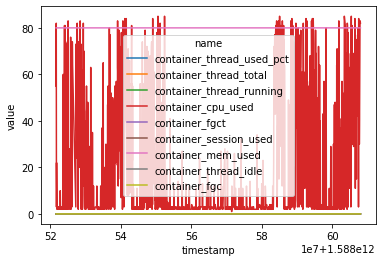

In [47]:
sns.lineplot(x='timestamp', y='value', hue='name', data=dock_04)